## Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data

In [2]:
data = pd.read_csv('Downloads/ames/AmesHousing.csv')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Data Processing

### Removing Not Needed Columns

In [3]:
data.drop(['Order', 'PID'], axis=1, inplace=True)

### Checking Correlation

In [5]:
data.corr()['SalePrice'].sort_values()

Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0.706780
Overall Qual       0

## Plotting and Checking Outliers in Most Correlated Columns

<AxesSubplot: xlabel='Overall Qual', ylabel='SalePrice'>

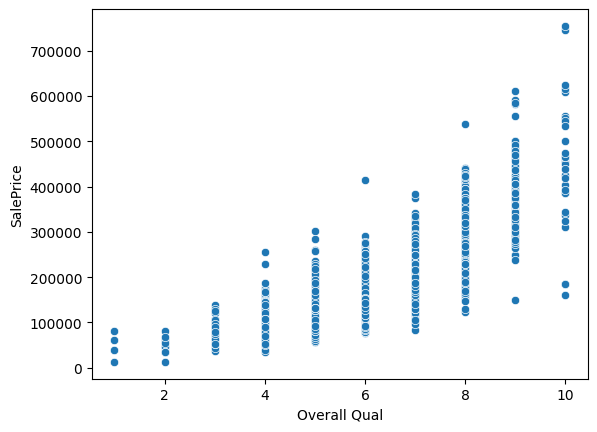

In [9]:
# plt.figure(figsize=(6,4), dpi=200)
sns.scatterplot(x='Overall Qual', y='SalePrice', data=data)

<AxesSubplot: xlabel='Gr Liv Area', ylabel='SalePrice'>

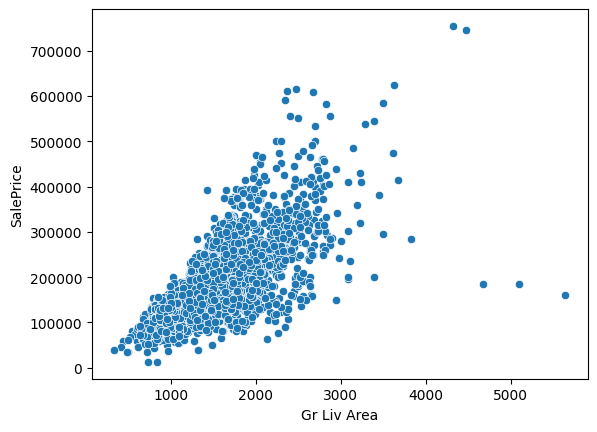

In [10]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=data)

### Dropping the outliers

In [12]:
data_index = data[(data['Gr Liv Area'] > 4000) & (data['SalePrice'] < 400000)].index

In [13]:
data = data.drop(data_index, axis=0)

<AxesSubplot: xlabel='Gr Liv Area', ylabel='SalePrice'>

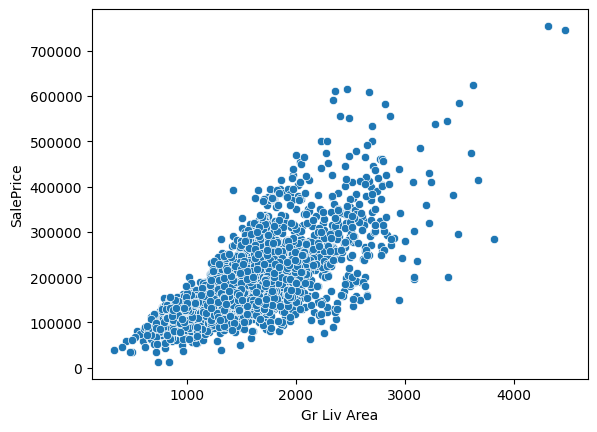

In [14]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=data)

<AxesSubplot: xlabel='Garage Area', ylabel='SalePrice'>

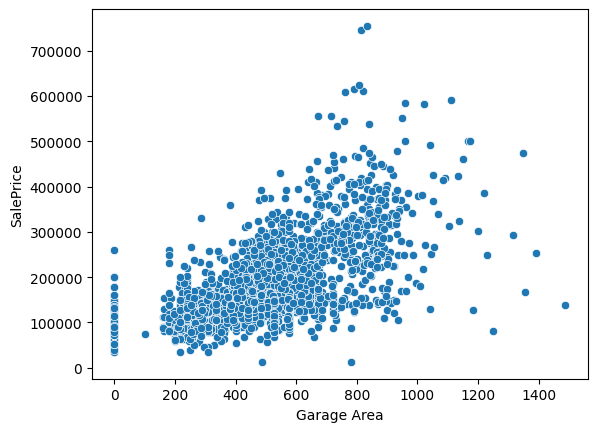

In [16]:
sns.scatterplot(x='Garage Area', y='SalePrice', data=data)

<AxesSubplot: xlabel='Total Bsmt SF', ylabel='SalePrice'>

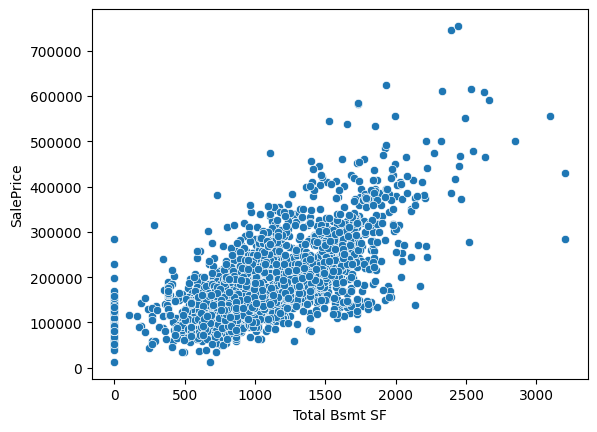

In [17]:
sns.scatterplot(x='Total Bsmt SF', y='SalePrice', data=data)

In [39]:
df_out_clean = data

<AxesSubplot: xlabel='Gr Liv Area', ylabel='SalePrice'>

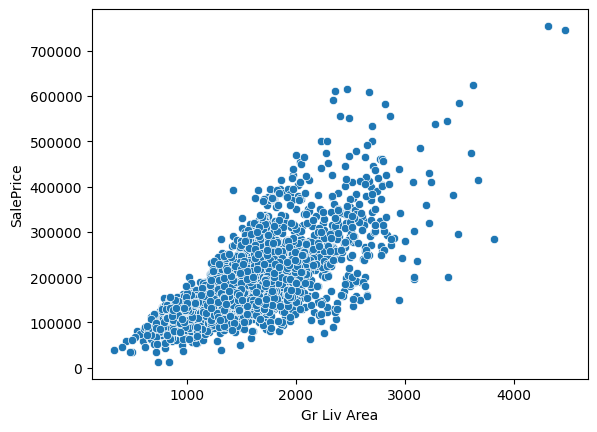

In [19]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df_out_clean)

## Working on Missing Values

In [20]:
df_out_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2927 non-null   int64  
 1   MS Zoning        2927 non-null   object 
 2   Lot Frontage     2437 non-null   float64
 3   Lot Area         2927 non-null   int64  
 4   Street           2927 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2927 non-null   object 
 7   Land Contour     2927 non-null   object 
 8   Utilities        2927 non-null   object 
 9   Lot Config       2927 non-null   object 
 10  Land Slope       2927 non-null   object 
 11  Neighborhood     2927 non-null   object 
 12  Condition 1      2927 non-null   object 
 13  Condition 2      2927 non-null   object 
 14  Bldg Type        2927 non-null   object 
 15  House Style      2927 non-null   object 
 16  Overall Qual     2927 non-null   int64  
 17  Overall Cond  

In [22]:
df_out_clean.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [23]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [31]:
percent_nan = percent_missing(df_out_clean)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

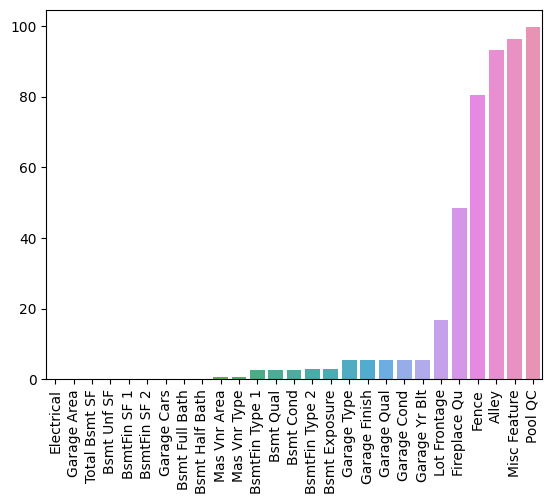

In [25]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

(0.0, 1.0)

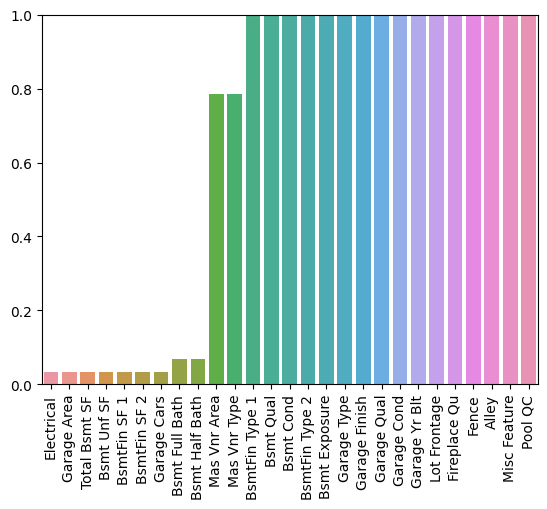

In [26]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

In [27]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [40]:
df_out_clean[df_out_clean['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


### Filling Basement Columns

In [41]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df_out_clean[bsmt_num_cols] = df_out_clean[bsmt_num_cols].fillna(0)

In [42]:
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df_out_clean[bsmt_str_cols] = df_out_clean[bsmt_str_cols].fillna('None')

In [43]:
percent_nan = percent_missing(df_out_clean)
percent_nan

Electrical        0.034165
Garage Cars       0.034165
Garage Area       0.034165
Mas Vnr Type      0.785787
Mas Vnr Area      0.785787
Garage Type       5.363854
Garage Yr Blt     5.432183
Garage Finish     5.432183
Garage Qual       5.432183
Garage Cond       5.432183
Lot Frontage     16.740690
Fireplace Qu     48.582166
Fence            80.457807
Alley            93.235395
Misc Feature     96.412709
Pool QC          99.590024
dtype: float64

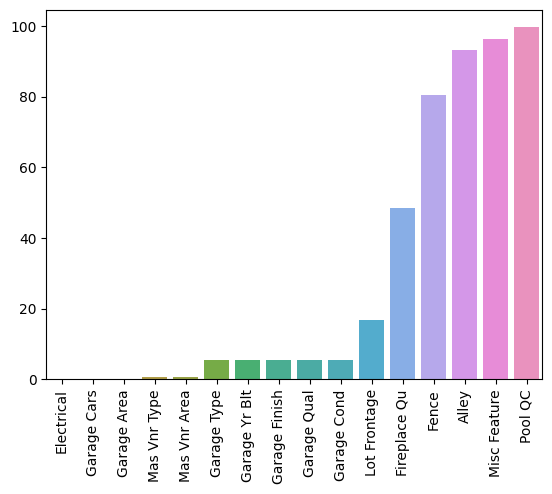

In [44]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [45]:
df_out_clean = df_out_clean.dropna(axis=0, subset=['Electrical', 'Garage Cars'])

In [46]:
percent_nan = percent_missing(df_out_clean)
percent_nan

Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

### Filling Masonry Veener Columns

In [47]:
df_out_clean['Mas Vnr Type'] = df_out_clean['Mas Vnr Type'].fillna('None')
df_out_clean['Mas Vnr Area'] = df_out_clean['Mas Vnr Area'].fillna(0)

/var/folders/dc/__dw74yd6b7bwyhnpw2bmzjh0000gn/T/ipykernel_26744/1970260271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_clean['Mas Vnr Type'] = df_out_clean['Mas Vnr Type'].fillna('None')
/var/folders/dc/__dw74yd6b7bwyhnpw2bmzjh0000gn/T/ipykernel_26744/1970260271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_clean['Mas Vnr Area'] = df_out_clean['Mas Vnr Area'].fillna(0)


In [48]:
percent_nan = percent_missing(df_out_clean)
percent_nan

Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

### Filling Garage Columns

In [49]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df_out_clean[gar_str_cols] = df_out_clean[gar_str_cols].fillna('None')

/var/folders/dc/__dw74yd6b7bwyhnpw2bmzjh0000gn/T/ipykernel_26744/4073000062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_clean[gar_str_cols] = df_out_clean[gar_str_cols].fillna('None')


In [50]:
df_out_clean['Garage Yr Blt'] = df_out_clean['Garage Yr Blt'].fillna(0)

/var/folders/dc/__dw74yd6b7bwyhnpw2bmzjh0000gn/T/ipykernel_26744/2883082104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_clean['Garage Yr Blt'] = df_out_clean['Garage Yr Blt'].fillna(0)


In [51]:
percent_nan = percent_missing(df_out_clean)

In [52]:
percent_nan

Lot Frontage    16.752137
Fireplace Qu    48.547009
Fence           80.478632
Alley           93.230769
Misc Feature    96.410256
Pool QC         99.589744
dtype: float64

### Dropping columns with most missing data

In [53]:
df_out_clean = df_out_clean.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

In [54]:
percent_nan = percent_missing(df_out_clean)
percent_nan

Lot Frontage    16.752137
Fireplace Qu    48.547009
dtype: float64

### Filling Fireplace Column

In [57]:
df_out_clean['Fireplace Qu'] = df_out_clean['Fireplace Qu'].fillna('None')

In [58]:
percent_nan = percent_missing(df_out_clean)
percent_nan

Lot Frontage    16.752137
dtype: float64

### Filling LotFrontage Column

#### Lot frontage column looks like is related to which Neighborhood is the house in.

In [60]:
df_out_clean.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [62]:
df_out_clean['Lot Frontage'] = df_out_clean.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [63]:
percent_nan = percent_missing(df_out_clean)
percent_nan

Lot Frontage    0.102564
dtype: float64

In [65]:
df_out_clean['Lot Frontage'] = df_out_clean['Lot Frontage'].fillna(0)

In [66]:
percent_nan = percent_missing(df_out_clean)
percent_nan

Series([], dtype: float64)

In [67]:
df_cleaned = df_out_clean.copy()
df_cleaned.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [68]:
df_cleaned.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [69]:
df_cleaned['MS SubClass'].unique()

array([ 20,  60, 120,  50,  85, 160,  80,  30,  90, 190,  45,  70,  75,
        40, 180, 150])

#### Since MS Subclass has categorical data in numerical format. Let's convert it into String.

In [71]:
df_cleaned['MS SubClass'] = df_cleaned['MS SubClass'].apply(str)

Let's seperate Numerical and Categorical Columns

In [75]:
df_num = df_cleaned.select_dtypes(exclude='object')
df_cat = df_cleaned.select_dtypes(include='object')

In [76]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath     

In [78]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    2925 non-null   object
 18  Exter Qu

Let's One Hot Encode the Categorical Columns

In [80]:
df_cat = pd.get_dummies(df_cat, drop_first=True)
df_cat.shape

(2925, 238)

In [81]:
final_df = pd.concat([df_cat, df_num], axis=1)
final_df.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,210,62,0,0,0,0,0,5,2010,215000
1,0,0,0,0,1,0,0,0,0,0,...,140,0,0,0,120,0,0,6,2010,105000
2,0,0,0,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,172000
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,2010,244000
4,0,0,0,0,0,0,0,0,0,1,...,212,34,0,0,0,0,0,3,2010,189900


In [82]:
final_df.shape

(2925, 274)

In [83]:
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
X = final_df.drop('SalePrice', axis=1)
y = final_df['SalePrice']

In [85]:
kf = KFold(shuffle=True, random_state=42, n_splits=4)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
sc = StandardScaler()
mm = MinMaxScaler()

### Linear Regression

In [89]:
lin_reg = LinearRegression()


sc_X_train = sc.fit_transform(X_train)
lin_reg.fit(sc_X_train, y_train)
X_test = sc.transform(X_test)
y_pred = lin_reg.predict(X_test)
linear_score = r2_score(y_pred, y_test)

### Linear Regression with Cross Validation

In [91]:
estimator = Pipeline([('sc', sc), ('lin_reg', lin_reg)])
predictions_lr = cross_val_predict(estimator, X_train, y_train, cv=kf)
kf_lin_score = r2_score(y_train, predictions_lr)

In [92]:
print(f'The simple linear score is {linear_score} and linear score with K-Fold Cross Validation is {kf_lin_score}')

The simple linear score is -0.006623196994768987 and linear score with K-Fold Cross Validation is -4.9786751625061066e+23


### Lasso Regression

In [ ]:
poly_feat = PolynomialFeatures(degree=4)
scores = []
alphas = np.geomspace(0.02, 2.0, 20)
pred_lasso = []

for alpha in alphas:
  las = Lasso(alpha=alpha, max_iter= 100000)

  estimator = Pipeline([
      ('scaler',sc),
      ('poly_feat', poly_feat),
      ('lasso_regression', las)])
  
  pred_lasso = cross_val_predict(estimator, X_train, y_train, cv=kf)

  las_score = r2_score(y_train, pred_lasso)

  scores.append(las_score)


plt.semilogx(alphas, scores, '-x', color='blue')
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');